<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/AppliedDataAnalysis_SupermarketAnalysisSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exploratory Data Analysis Case Study 1 : Supermarket Sales Datasets.

#### Context - Kaggle
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.
k

#### Objectives

A supermarket chain is looking to expand their business. The company leadership team has provided the data science team with historical supermarket sales data. Leadership is interested in finding answers to several questions:
1. What is the average purchase total of a customer's cart?
    2. What was the average overall customer rating?
    3. How do customer ratings compare at each of our 3 branch locations?
    4. Which branch location is most profitable?
    5. Do members tend to spend more money than non-members?
    6. What is our best selling product line?
    7. How do sales fluctuate during the week? Which day of the week is most profitable?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sales_data=pd.read_csv('/content/supermarket_sales - Sheet1.csv')
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales_data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6



#### Column Descriptions
1. Unit price: Price of each product in $
2. Quantity: Number of products purchased by customer
3. Tax: 5% tax fee for customer buying
4. Total: Total price including tax
5. Date: Date of purchase (Record available from January 2019 to March 2019)
6. Time: Purchase time (10am to 9pm)
7. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
8. COGS: Cost of goods sold
9. Gross margin percentage: Gross margin percentage
10. Gross income: Gross income
11. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [ ]:
# Dataset information e.i their data types,number of columns, number of records
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

###Recommendation
1. The column and date have been represented as string objects instead of Datetime object as too help us perform Time series analysis effectively.
2. The day of the week has not been recorded therefore we need a merchanism to extract the days of the week when the sales were made so as to determine the best performing day of the week.
3. The columns "gross margin percentage" and "gross income"
are having inconsistent values , therefore we will drop or clean them.


In [ ]:
# 1.Represent the column as DateTime object instead of string object so that we can effectively perform time series later on the dataset
# From the Datetime Object, we can access the Days of the Week for Each Transaction that made.
sales_data['Date']=pd.to_datetime(sales_data['Date'])
sales_data['Date']


,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


Now the column has been represented as DateTime Object for effective Time series anlysis

In [ ]:
# 2. We want to index all the sales tranctions according to the datetime object
# This will help extract a particular insight based on the date it was recorded

#Before the original indexing


In [ ]:
# alter the original indexing to use the date column
sales_data.set_index('Date', inplace=True)
# Sort
sales_data.sort_index(inplace=True)
sales_data.head(3)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7


In [ ]:
# 3. Create a new columns(Day_of_Week) to Record the Day of the Week that a Particular Transaction was Done.
sales_data['Day_of_Week'] = sales_data.index.day_of_week
sales_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,1
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,1
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,1
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,1
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,1


In [ ]:

# Label Encoding: This is the Processing of Converting Numerical Data to Textual Data and Vice Versa
# E,g The Column Day_of_week Has Been Represented as Numerical instead of Categorical(Textual)

# Lets the Day_of_week Column
sales_data.groupby('Day_of_Week').size()

,0
Day_of_Week,
0,125
1,158
2,143
3,138
4,139
5,164
6,133


In [ ]:

# We can either use replace() or map() function to label encode values in a Column
# Refer(Pandas Series)

sales_data['Day_of_Week'] = sales_data['Day_of_Week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

sales_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday


In [ ]:
# 4.0
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
sales_data.shape

(1000, 17)

In [ ]:

# Dropping the two Columns
sales_data.drop(['gross margin percentage', 'gross income'], axis=1, inplace=True)
sales_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


# DATA ANLYSIS

### 1. What is the overall Customer Rating in the Supermarket?

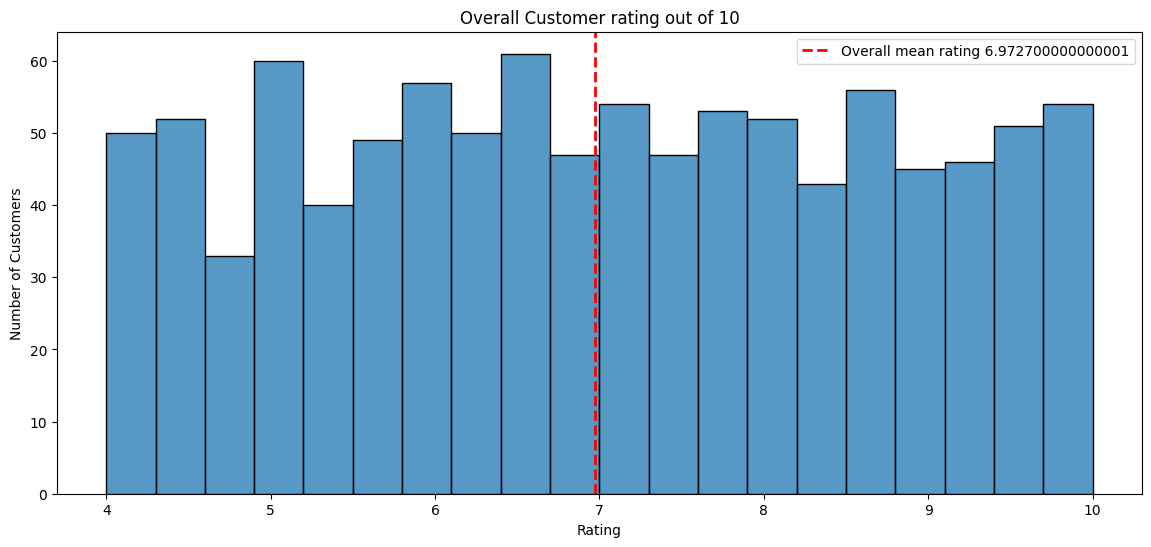

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=sales_data, x='Rating', bins=20)
plt.title('Overall Customer rating out of 10')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
# Visualise the average rating in the supermarket
mean_rating=sales_data['Rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2)

# Add a ledend(title to the axvline)
plt.legend([f'Overall mean rating {mean_rating}'])
# plt.show()



*   There is a fairly even distribution of ratings from 4 - 10
*   The overall average rating was 6.97 out of 10
k


### 2. How do customer ratings compare across the 3 supermarket branches?
Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction? Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch C is in Naypyitaw.

In [ ]:
sales_data.groupby('Branch').size()

,0
Branch,
A,340
B,332
C,328


In [ ]:
sales_data.groupby('City').size()

,0
City,
Mandalay,332
Naypyitaw,328
Yangon,340


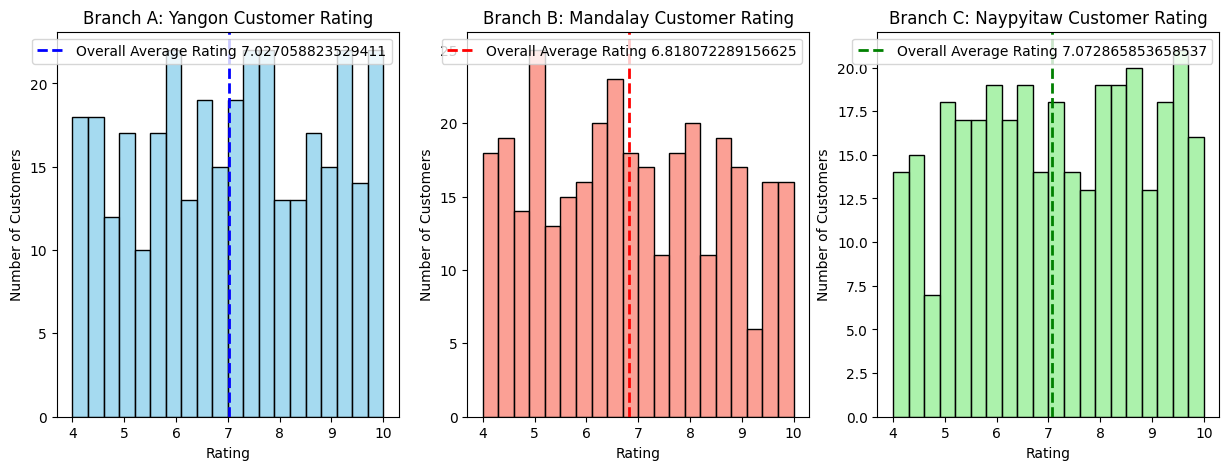

In [ ]:

# Lets Visualize the Individual Rating for each Branches in a Sub-Plot.
# With a subplot, we can draw several graphs on a single visualization

# Step1: Create 3 dataframes for each cities(sales for each city)
yangon_sales = sales_data[sales_data['City']=='Yangon']
mandalay_sales = sales_data[sales_data['City']=='Mandalay']
naypyitaw_sales = sales_data[sales_data['City']=='Naypyitaw']

# Step2: Let draw 3 histograms in a subplot.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
# PLot the distribution  for eavh city
sns.histplot(data=yangon_sales, x='Rating', ax=axes[0], bins=20, color='skyblue')
sns.histplot(data=mandalay_sales, x='Rating', ax=axes[1], bins=20, color='salmon')
sns.histplot(data=naypyitaw_sales, x='Rating', ax=axes[2], bins=20, color='lightgreen')

# Set the Title for Each Plot According to the City
axes[0].set_title('Branch A: Yangon Customer Rating')
axes[1].set_title('Branch B: Mandalay Customer Rating')
axes[2].set_title('Branch C: Naypyitaw Customer Rating')

# Set the Xlabel for Each Plot
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')


# Set the Ylabel for Each Plot
axes[0].set_ylabel('Number of Customers')
axes[1].set_ylabel('Number of Customers')
axes[2].set_ylabel('Number of Customers')

# Plot the Average using the axvline for each plot
mean_yangon = yangon_sales['Rating'].mean()
mean_mandalay = mandalay_sales['Rating'].mean()
mean_naypyitaw = naypyitaw_sales['Rating'].mean()

# a) yangon
axes[0].axvline(mean_yangon, color='blue', linestyle='dashed', linewidth=2)
axes[0].legend([f'Overall Average Rating {mean_yangon}'])

# a) mean_mandalay
axes[1].axvline(mean_mandalay, color='red', linestyle='dashed', linewidth=2)
axes[1].legend([f'Overall Average Rating {mean_mandalay}'])

# a) mean_naypyitaw
axes[2].axvline(mean_naypyitaw, color='green', linestyle='dashed', linewidth=2)
axes[2].legend([f'Overall Average Rating {mean_naypyitaw}'])



### Observations

*   The rating distributions are relatively similar across all three supermarket branches in different cities
*   The difference in average ratings between supermarket branches is relatively small. The highest rating was 7.07 / 10 in Naypyitaw.
*   The lowest was 6.82 in Mandalay. There is not a single branch that seems to have disproportionately low ratings.



## Which product lines drove the highest sales? Which were the most common?

Now we can turn our attention to product lines. If a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines.

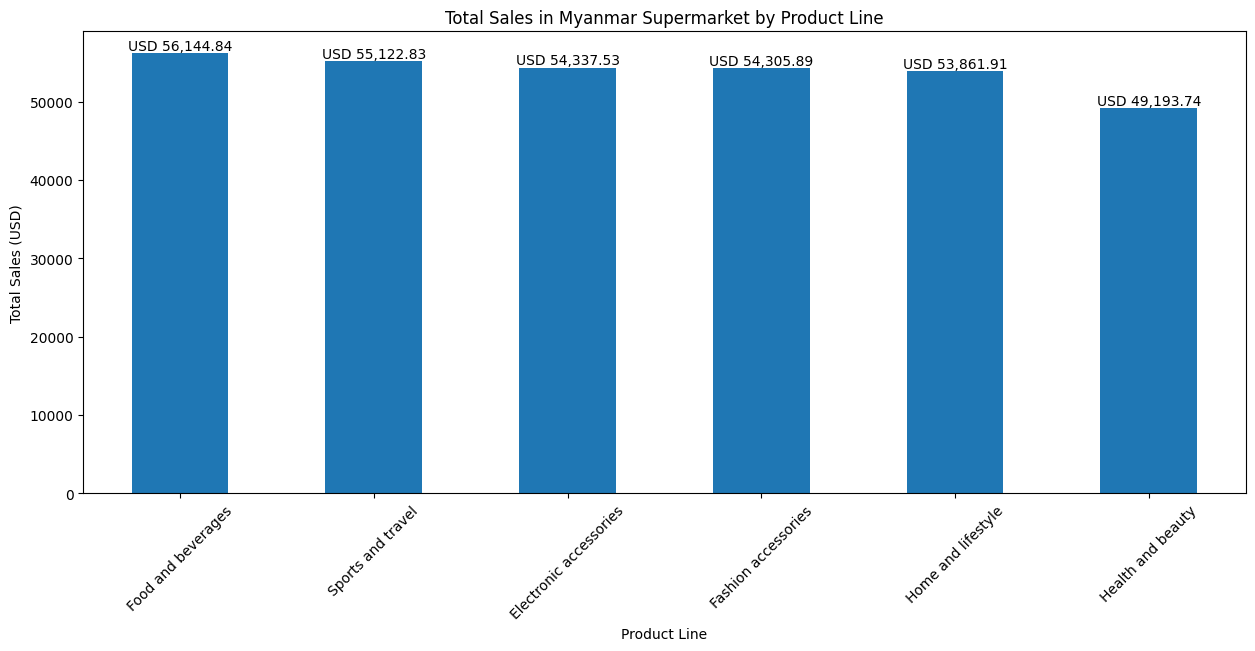

In [ ]:
# Group all product lines based on the total sales
products_line_total = sales_data.groupby('Product line').sum()

# Sort the total product lines in descending order
products_line_total = products_line_total.sort_values(by='Total', ascending=False)

# Visualize the totals in a bar plot
plt.figure(figsize=(15, 6))
ax = products_line_total['Total'].plot(kind='bar')

# Add the Title and the Labels
plt.title('Total Sales in Myanmar Supermarket by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (USD)')

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Add the labels for the maximum values in the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'USD {bar.get_height():,.2f}',  # Formatting with thousand separators and 2 decimals
            ha='center', va='bottom')

# Show the plot
plt.show()



#### Observations
*   "Food and Beverages" was the top selling product line with USD 56144.844/- in sales.
*   The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales
*   "Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales


## How did product lines perform among different gender categories?

Lets examine the products lines that were preferred between men and women on the stores.

In [ ]:

# Lets Confirm that Men and Women were equally distributed in our Analysis
sales_data.groupby('Gender').size()

,0
Gender,
Female,501
Male,499


In [ ]:
# Create two DataFrames with Men and Women Transactions Separated
mens_sales=men_sales = sales_data[sales_data['Gender'] == 'Male']
women_sales=women_sales = sales_data[sales_data['Gender'] == 'Female']

# Group Each Transaction by Total Sales
mens_sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)
women_sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Index: Product_line
# Column Total : Total Sales

,Total
Product line,
Food and beverages,33170.9175
Fashion accessories,30437.4000
Home and lifestyle,30036.8775
Sports and travel,28574.7210
Electronic accessories,27102.0225
Health and beauty,18560.9865


<ipython-input-105-0d2fe0198b1a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


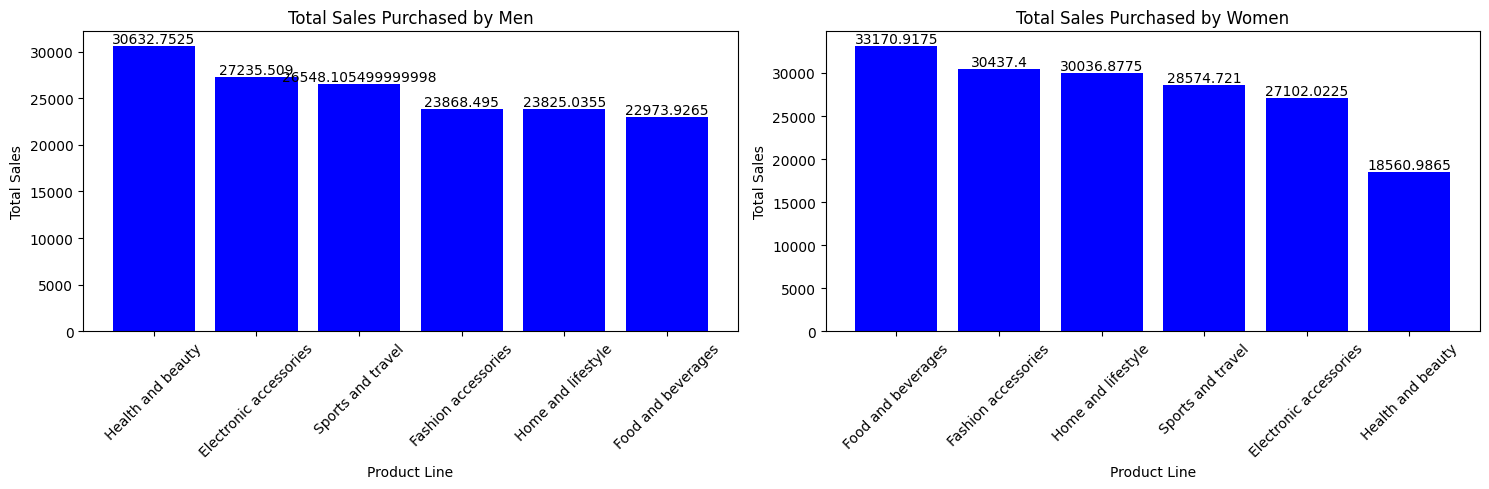

In [ ]:
# Create two DataFrames with Men and Women Transactions Separated
men_sales = sales_data[sales_data['Gender'] == 'Male']
women_sales = sales_data[sales_data['Gender'] == 'Female']

# Group each transaction by product line and total sales, then sort by sales
mens_sales_total = men_sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)
women_sales_total = women_sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Men at axis=0
axes[0].bar(mens_sales_total.index, mens_sales_total.values, color='blue')
axes[0].set_title('Total Sales Purchased by Men')
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)  # Rotate the X-label for readability

# Women at axis=1
axes[1].bar(women_sales_total.index, women_sales_total.values, color='blue')
axes[1].set_title('Total Sales Purchased by Women')
axes[1].set_xlabel('Product Line')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=45)  # Rotate the X-label for readability

# Rotate the Xlabel
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Men
# Add total number of transaction labels for first bar chart
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')

# Add total number of transaction labels for second bar chart
for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



###Observation

*   Women and men were roughly equally represented in the dataset.
*   The "Fashion accessories" product line was most popular with women with 96 transactions. It was 4th popular for men with 82 transactions.
*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.

*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health a
k

## How did the sales data fluctuate over time?(Jan 2019 to March 2019)

In [ ]:
# Time series analysis : It is used to analyze and visualize datarime data to show trends
daily_sales=sales_data.groupby('Date')['Total'].sum()
daily_sales.head(5)

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835


Text(0, 0.5, 'Daily Total Sales in US Dollars')

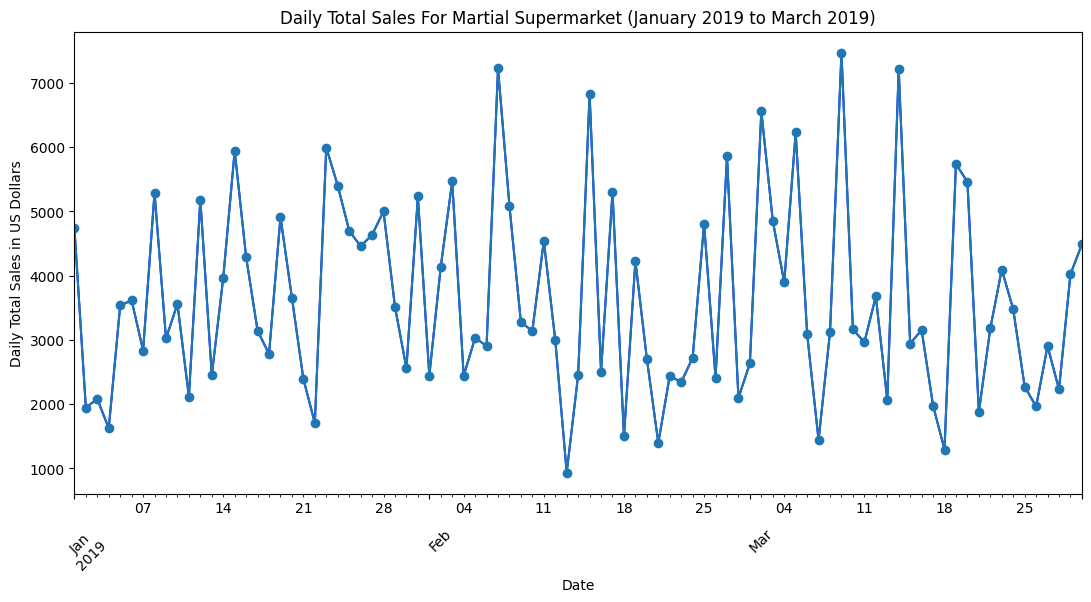

In [ ]:
# Plot the Daily Sales in a Line Plot
plt.figure(figsize=(13,6))
daily_sales.plot(color='blue')
daily_sales.plot(marker='o')

plt.title('Daily Total Sales For Martial Supermarket (January 2019 to March 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Total Sales in US Dollars')


###Observation in trend analysis

*   The Daily Sales tend to fluctuate at a fair amount.
*   The Day with the Lowest Sales is February 13th, was on a Wednesday.
*   The highest Sales was in March 9th, was a Saturday.


One hypothesis might be that weekends tend to have higher sales than Weekdays.

Lets Prove to either ACCEPT or REJECT the Hypothesis.

Hypothesis: This is an Assumption made during an anlysis, which has to be proven whether it is True or False. e,g Kenya is the Fastest Growing Economy in Sub-Saharan Africa.

In [ ]:
# Leets Group the Sales by the Day of the Week
day_of_week_totals = sales_data.groupby('Day_of_Week')['Total'].sum()

# Re arrange the Days of the Week to follow a normal order
day_of_week_totals = day_of_week_totals.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_totals


,Total
Day_of_Week,
Monday,37899.0780
Tuesday,51482.2455
Wednesday,43731.1350
Thursday,45349.2480
Friday,43926.3405
Saturday,56120.8095
Sunday,44457.8925


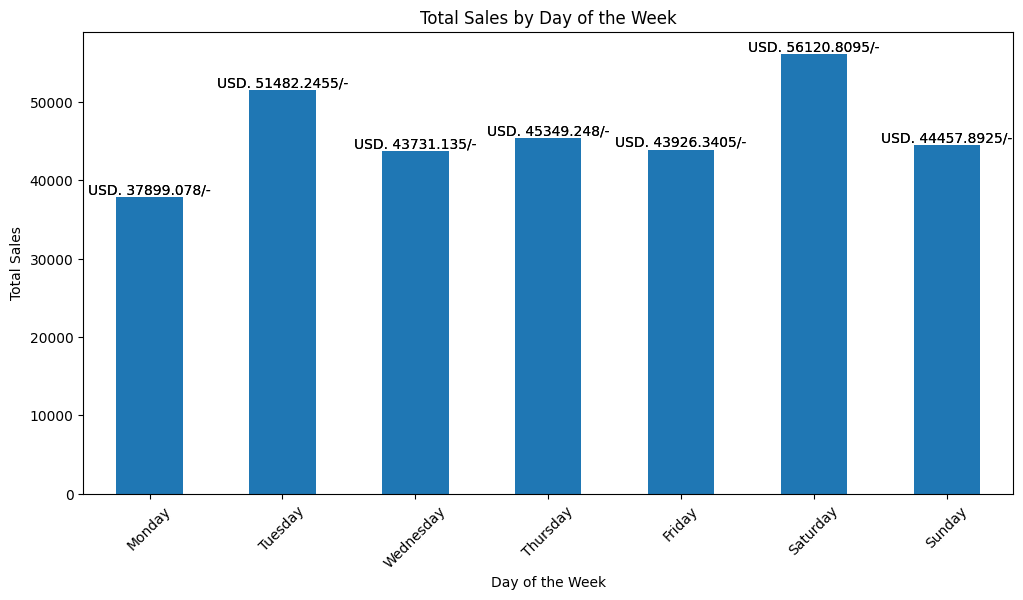

In [ ]:

plt.figure(figsize=(12,6))
ax=day_of_week_totals.plot(kind='bar')
day_of_week_totals.plot(kind='bar')

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

# Add the labels for the maxim values in the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')
plt.show()

#### Observations
*   The Best Day of the Week for sales during the time period was Saturday with a Combined Sales of 56,120.8095/- USD
*   The worst of the week for sales during the period of time was Monday with combined Sales of 37,899.078/- USD.
*   Suprisingly, Tuesday was the Day with the Second Highest Sales.
*   Sundays, Wednesdays, Thursady and Friday all had similar sales

In [ ]:
# Recomendation system
# 1. Collaborative
# 2 Content-Based